### Fit S21 traces for R2_F1_4p47

In [13]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [14]:
resonator_name = "R2_F1_4p47"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [15]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 25
    # data points      = 480
    # variables        = 4
    chi-square         = 6.2643e-04
    reduced chi-square = 1.3160e-06
    Akaike info crit   = -6495.64487
    Bayesian info crit = -6478.94973
    R-squared          = np.complex128(9729702507.589634+42143851215.20679j)
[[Variables]]
    fr:     4.4652e+09 +/- 5.32404258 (0.00%) (init = 4.465156e+09)
    Ql:     117239.156 +/- 32.7836230 (0.03%) (init = 116611.8)
    absQc:  137048.226 +/- 32.9547193 (0.02%) (init = 136313.9)
    phi:    0.48196808 +/- 2.4040e-04 (0.05%) (init = 0.4819711)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     484477.300 +/- 345.417408 (0.07%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8600
    C(fr, phi)   = -0.8598


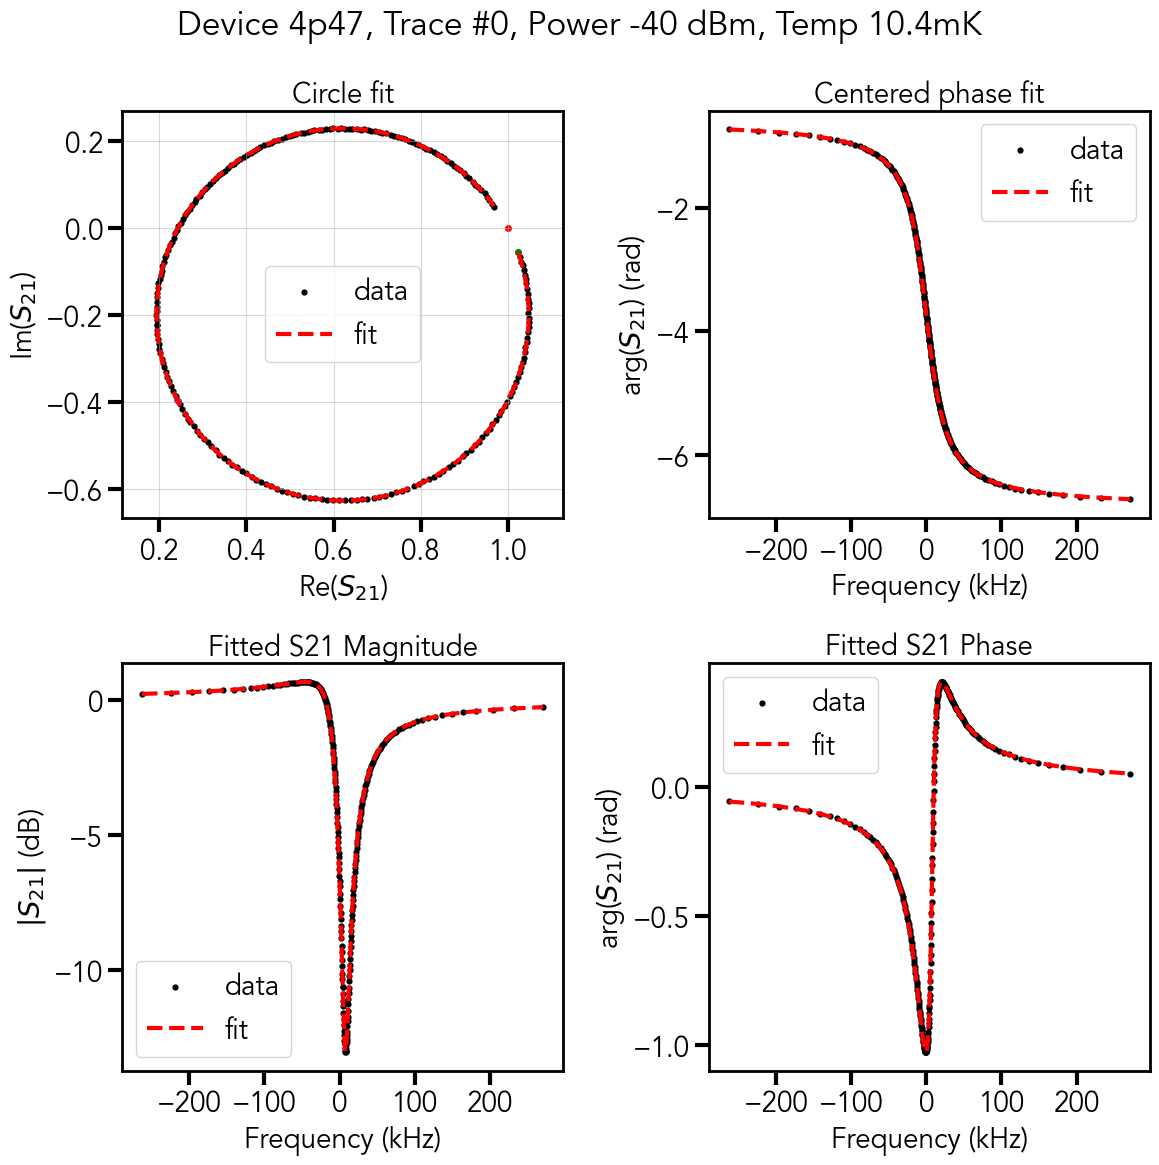

In [16]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [17]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [18]:
save_traces(traces, output_file)